In [41]:
# Import SpreadSheet from Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/content/drive/My Drive/cleaned_amazon_reviews.csv')
df.head()

,product_name,review_id,asin,review_title,author,rating,review_text,timestamp,profile_id,is_verified,...,attr_Color: White Smoke,attr_Color: WhiteStyle: Flip 6,attr_Style: Flip 5Color: Black,attr_Style: Flip 5Color: Eco Green,attr_Style: Flip 5Color: Gray,attr_Style: Flip 5Color: Green,attr_Style: Flip 5Color: Pink,attr_Style: Flip 5Color: Red,attr_Style: Flip 5Color: Teal,attr_Style: Flip 5Color: White
0,BeatsPillPlus,R2DQAQ3RL2II2V,B016QXV2QK,5.0 out of 5 stars Even better than our old ja...,Chris,5,We have a jambox original that we’ve had forev...,"Reviewed in the United States July 24, 2020",AEVQN5XRWKZRQAYNJNHKACH5EOMQ,True,...,False,False,False,False,False,False,False,False,False,False
1,BeatsPillPlus,R3V4RSDVPBJJ2S,B016QXV2QK,4.0 out of 5 stars Good quality for the price,Brian E.,4,My amazon order got lost in shipping but I did...,"Reviewed in the United States May 18, 2020",AHADPON2ZSWLZQVKNVSLQT4CTIVQ,True,...,False,False,False,False,False,False,False,False,False,False
2,BeatsPillPlus,R1W74YFDQTCB6T,B016QXV2QK,5.0 out of 5 stars Big sound in a small package.,JW,5,I gave this to my wife as a gift. She uses it ...,"Reviewed in the United States May 25, 2021",AEIMAOS463R6YKKYW4BRJN6QHOPA,True,...,False,False,False,False,False,False,False,False,False,False
3,BeatsPillPlus,R2GUWI7S3U827X,B016QXV2QK,5.0 out of 5 stars Great product will never no...,Nathaniel Pratz,5,I adore the speaker I missed the boat on the o...,"Reviewed in the United States January 13, 2021",AFMGLCE2HGVWXCBV4FZPTSWC5DBA,True,...,False,False,False,False,False,False,False,False,False,False
4,BeatsPillPlus,R2MC4WA517L588,B016QXV2QK,4.0 out of 5 stars Volume control was frustrating,Vanessa Miller,4,"As far as sound quality goes, it was awesome. ...","Reviewed in the United States March 18, 2021",AHPHSHJCFQLGFMPZL4FTBPDD2DPA,True,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# Calculate the Mean, Median, and Mode for the 'ratings' column
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()[0]

# Print the results
print("Mean rating:", mean_rating)
print("Median rating:", median_rating)
print("Mode rating:", mode_rating)

Mean rating: 4.809443507588533
Median rating: 5.0
Mode rating: 5


In [46]:
# Variance and Standard Deviation
variance = df['rating'].var()
std_dev = df['rating'].std()

print("Variance:", variance)
print("Standard Deviation:", std_dev)

Variance: 0.1950458046579463
Standard Deviation: 0.4416399038333677


In [47]:
# Determine Quantiles for Ratings
quantiles = df['rating'].quantile([0.25, 0.5, 0.75])

print("Quantiles:")
print("Q1:", quantiles[0.25])
print("Q2 (Median):", quantiles[0.5])
print("Q3:", quantiles[0.75 ])

Quantiles:
Q1: 5.0
Q2 (Median): 5.0
Q3: 5.0


In [48]:
print("Min: ", df['rating'].min())
print("Max: ", df['rating'].max())

Min:  1
Max:  5


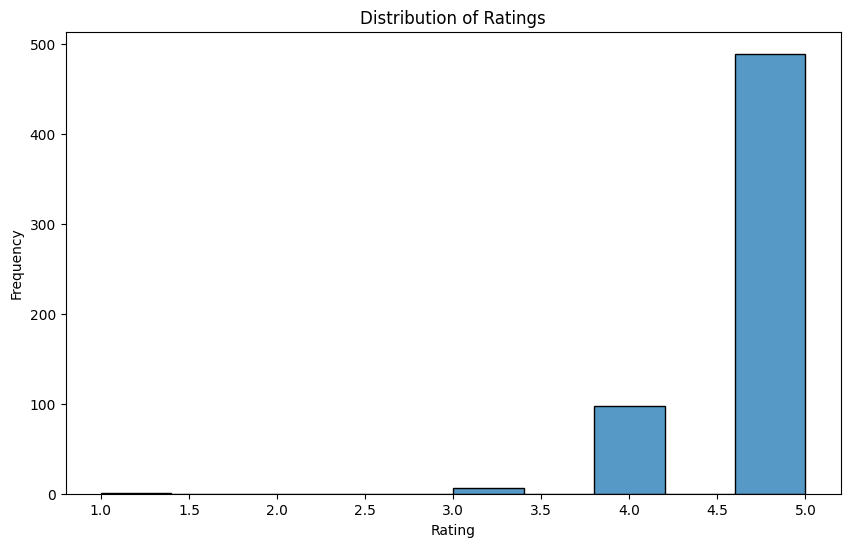

In [49]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

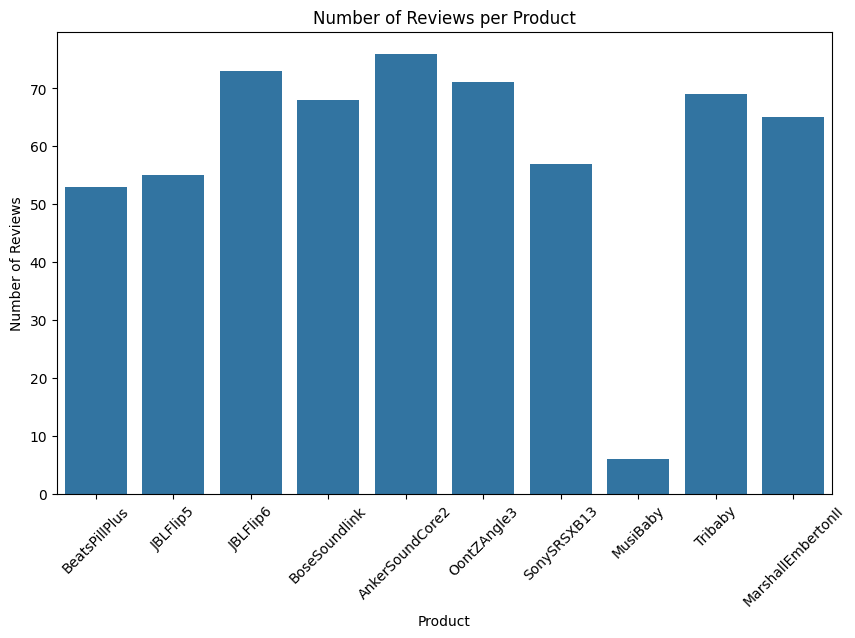

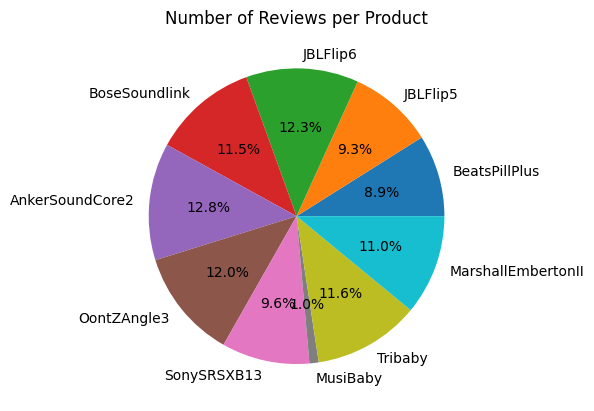

In [50]:
# Visualize Categories
# Get all products from product_name
products = df['product_name'].unique()
num_products = []
for product in products:
  num_products.append(df[df['product_name'] == product].shape[0])


plt.figure(figsize = (10, 6))
sns.barplot(x = products, y = num_products)
plt.title('Number of Reviews per Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation = 45)
plt.show()

print('\n\n')

plt.pie(num_products, labels = products, autopct = '%1.1f%%')
plt.title('Number of Reviews per Product')
plt.show()

In [51]:
df = pd.read_csv('/content/drive/My Drive/cleaned_amazon_reviews.csv')
df = df.select_dtypes(include=[np.number])
df.head()

,rating,helpful_count
0,5,0
1,4,0
2,5,0
3,5,0
4,4,0


Covariance Matrix:
                 rating  helpful_count
rating         0.195046            0.0
helpful_count  0.000000            0.0


Correlation Matrix:
               rating  helpful_count
rating            1.0            NaN
helpful_count     NaN            NaN


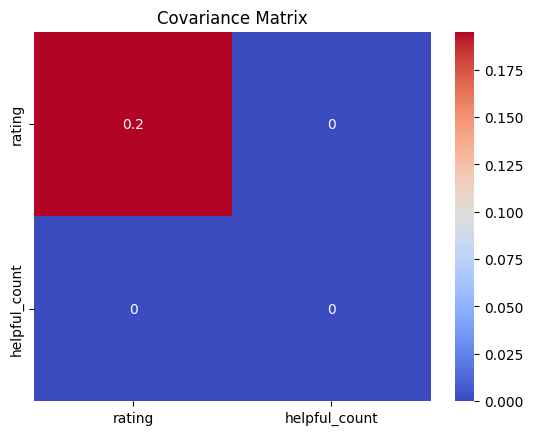

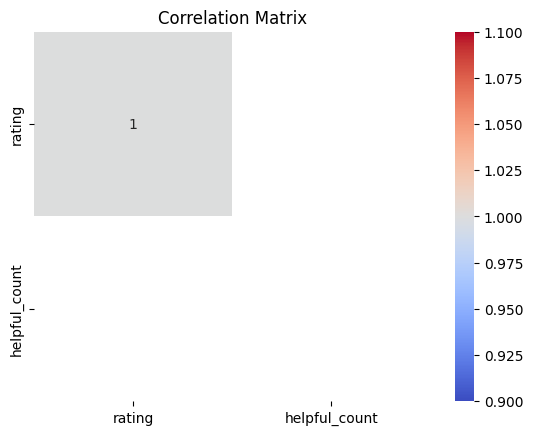

In [54]:
# Covariance Matrix
cov_matrix = df.cov()
corr_matrix = df.corr()

print("Covariance Matrix:")
print(cov_matrix)

print("\n\nCorrelation Matrix:")
print(corr_matrix)

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()